In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

In [211]:
df = pd.read_csv('datasets/Spacemissionlaunches/mission_launches.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [212]:
df = df.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [213]:
df.info()
print('\nTabla de instancias nulas\n\n',df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB

Tabla de instancias nulas

 Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64


In [214]:
df['country'] = [x.split(',')[-1].strip() for x in df['Location']]
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [215]:
df['country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

In [216]:
df['country'] = df['country'].replace('Shahrud Missile Test Site','Iran')
df['country'] = df['country'].replace('New Mexico','USA')
df['country'] = df['country'].replace('Pacific Missile Range Facility','USA')
df['country'] = df['country'].replace('Yellow Sea','China')
df['country'] = df['country'].replace('Gran Canaria','Spain')
df['country'] = df['country'].replace('Pacific Ocean','Russia')
df['country'] = df['country'].replace('Barents Sea','Russia')

In [217]:
country_codes = {
    'USA': 'USA',
    'China': 'CHN',
    'Kazakhstan': 'KAZ',
    'Japan': 'JPN',
    'Israel': 'ISR',
    'New Zealand': 'NZL',
    'Russia': 'RUS',
    'Iran': 'IRN',
    'France': 'FRA',
    'India': 'IND',
    'North Korea': 'PRK',
    'South Korea': 'KOR',
    'Brazil': 'BRA',
    'Spain': 'ESP',
    'Kenya': 'KEN',
    'Australia': 'AUS'
}

df['country'] = df['country'].apply(lambda x: country_codes.get(x, 'None'))

In [218]:
df['Date'] = pd.to_datetime(df['Date'],format='mixed',utc=True)
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [219]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [220]:
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,country,year,month,day
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020,8,7
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020,8,6
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,8,4
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,KAZ,2020,7,30
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020,7,30


In [221]:
mission = df[['Mission_Status','country']].pivot_table(index='country',columns='Mission_Status',aggfunc=len,fill_value=0).reset_index()
mission['Total'] = mission['Failure'] + mission['Partial Failure'] + mission['Success']
mission['Errors'] = (mission['Failure'] + mission['Partial Failure'])*-1
mission = mission.sort_values('Total',ascending=False)
mission.head()

Mission_Status,country,Failure,Partial Failure,Prelaunch Failure,Success,Total,Errors
14,RUS,66,30,0,1338,1434,-96
15,USA,129,33,1,1186,1348,-162
9,KAZ,72,20,1,608,700,-92
4,FRA,13,5,0,285,303,-18
2,CHN,19,6,0,244,269,-25


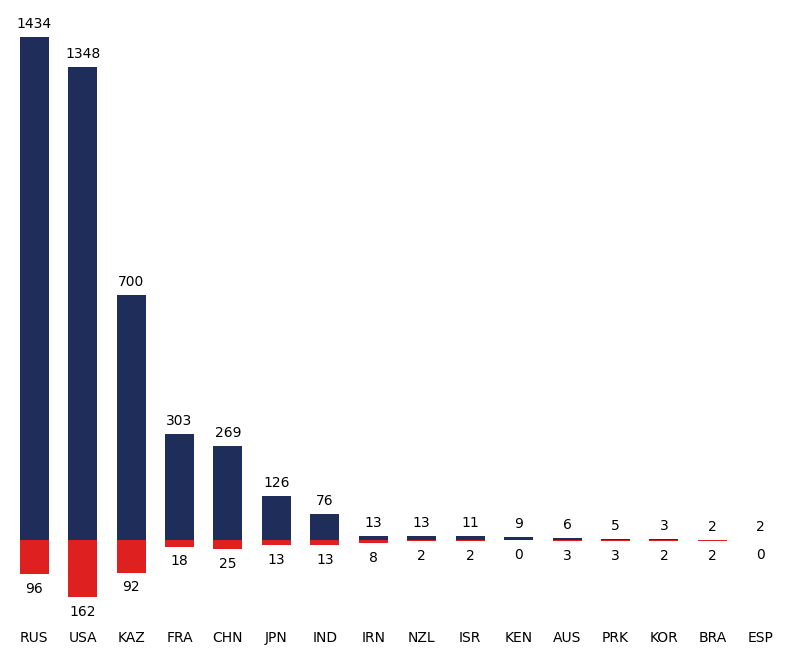

In [222]:
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(y='Total',
                 x='country',
                 data=mission,
                 color='#142864',
                 width=0.6)
ax = sns.barplot(y='Errors',
                 x='country',
                 data=mission,
                 color='red',
                 width=0.6)
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlabel('')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
    else:
        ax.annotate(f'{int(-1*p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha = 'center', 
                    va = 'center', 
                    xytext = (0, -10), 
                    textcoords = 'offset points')
ax.tick_params(axis=u'both', which=u'both',length=0)    
ax.set_yticks([])    

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)


In [239]:
rocket_active = df[['Rocket_Status','country']].pivot_table(index='country',columns='Rocket_Status',aggfunc=len,fill_value=0).reset_index()
rocket_active = rocket_active.sort_values('StatusActive',ascending=False)
rocket_active.head()

Rocket_Status,country,StatusActive,StatusRetired
2,CHN,224,45
15,USA,213,1136
4,FRA,113,190
14,RUS,72,1362
5,IND,50,26


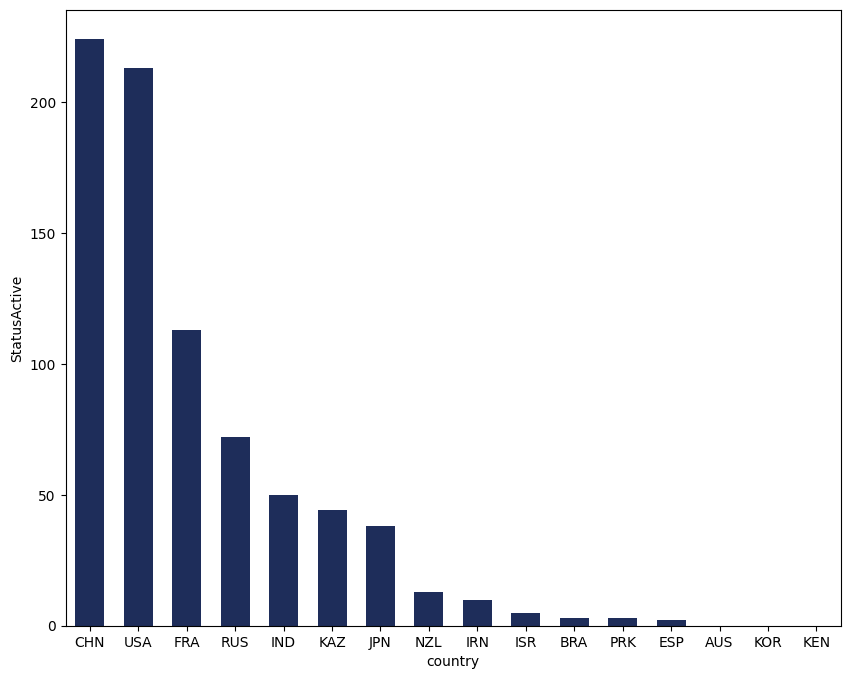

In [240]:
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(y='StatusActive',
                    x='country',
                    data=rocket_active,
                    color='#142864',
                    width=0.6)


In [224]:
missionperyear = df[['year','Mission_Status']].groupby(['year']).count().reset_index()
missionperyear = missionperyear.rename(columns={'Mission_Status':'Total'})
missionperyear

,year,Total
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


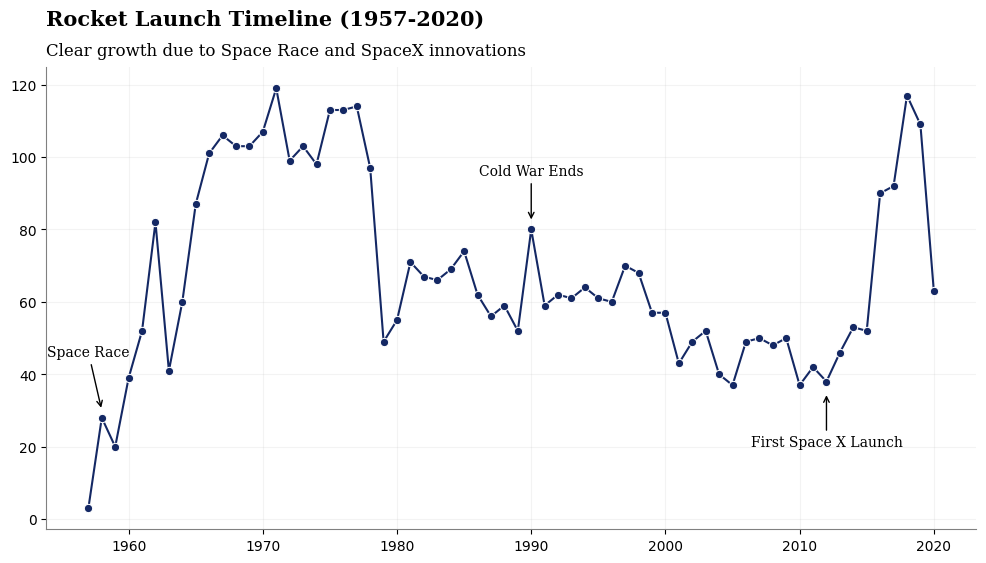

In [225]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax =sns.lineplot(data=missionperyear,
                 x='year',
                 y='Total',
                 marker='o',
                 color='#142864',
                 linewidth=1.5)
fig.text(0.125,.95,'Rocket Launch Timeline (1957-2020)', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.9,'Clear growth due to Space Race and SpaceX innovations',fontfamily='serif',fontsize=12)

ax.annotate('Cold War Ends', 
            xy=(1990, 82), 
            xytext=(1990, 95),
            horizontalalignment='center',
            fontfamily='serif',
            fontsize=10,
            arrowprops=dict(facecolor='black',
                            arrowstyle='->'))

ax.annotate('First Space X Launch', 
            xy=(2012, 35), 
            xytext=(2012, 20),
            fontfamily='serif',
            fontsize=10,
            horizontalalignment='center',
            arrowprops=dict(facecolor='black',
                            arrowstyle='->'))

ax.annotate('Space Race', 
            xy=(1958, 30), 
            xytext=(1957, 45),
            fontfamily='serif',
            fontsize=10,
            horizontalalignment='center',
            arrowprops=dict(facecolor='black',
                            arrowstyle='->'))
ax.set_xlabel('')
ax.set_ylabel('')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.grid(True,alpha=0.15)

In [226]:
carrer = df[['country', 'year']].groupby(['country']).agg(
    min_year=('year', 'min'),
    max_year=('year', 'max'),
).reset_index()
carrer = carrer.sort_values(by='max_year',ascending=False)
carrer

,country,min_year,max_year
2,CHN,1969,2020
7,ISR,1988,2020
6,IRN,2008,2020
4,FRA,1965,2020
12,NZL,2017,2020
14,RUS,1961,2020
9,KAZ,1957,2020
8,JPN,1966,2020
15,USA,1957,2020
5,IND,1979,2019


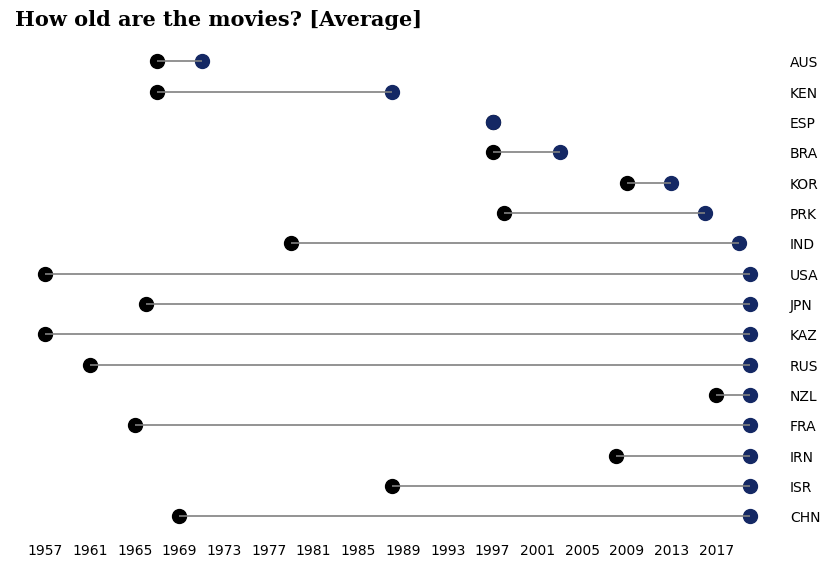

In [227]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6.5))

fig.text(0.13, 0.9, 'How old are the movies? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')

ax.hlines(y=carrer['country'],
          xmin=carrer['min_year'],
          xmax=carrer['max_year'],
          color='gray',
          linewidth=1.2)

ax.scatter(carrer['min_year'],
           carrer['country'],
           color='black',
           s=100)
ax.scatter(carrer['max_year'],
           carrer['country'],
           color='#142864',
           s=100)

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.yaxis.tick_right()
ax.set_xticks(np.arange(1957, 2020,4))


for spine in ['top', 'left', 'right', 'bottom']:
    ax.spines[spine].set_visible(False)

plt.show()

In [228]:
test = df[['country','year','Mission_Status']].groupby(['country','year']).agg(
    count=('Mission_Status','count')
).reset_index()

test = test.loc[test['country'].isin(['USA', 'RUS'])]
test['count'] = test.apply(lambda row: -1 * row['count'] if row['country'] == 'RUS' else row['count'], axis=1)
test

,country,year,count
289,RUS,1961,-2
290,RUS,1962,-8
291,RUS,1963,-8
292,RUS,1964,-8
293,RUS,1965,-10
...,...,...,...
408,USA,2016,27
409,USA,2017,30
410,USA,2018,34
411,USA,2019,27


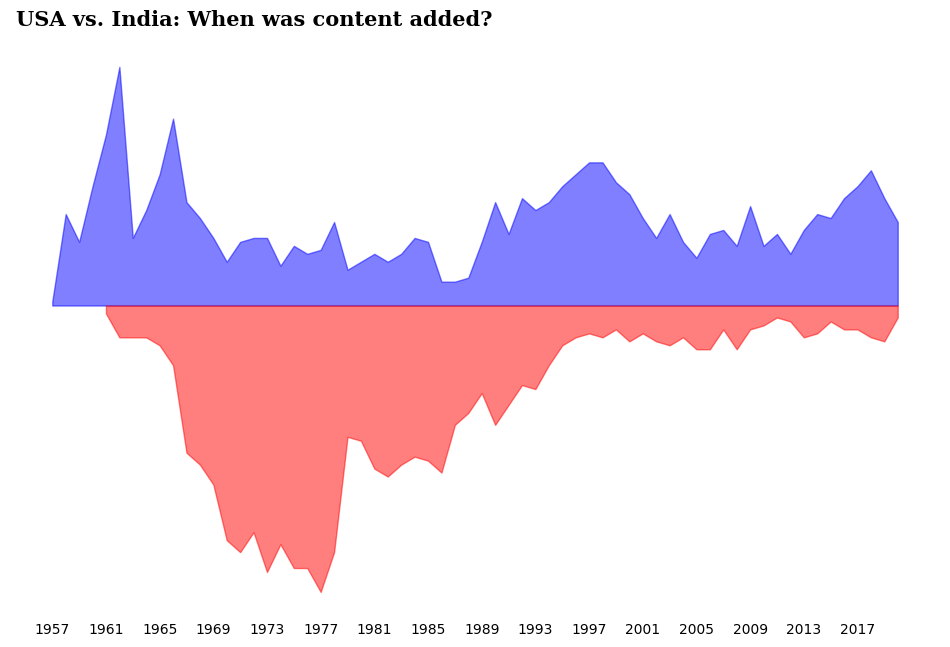

In [229]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7.5))

fig.text(0.13, 0.90, 'USA vs. India: When was content added?', fontsize=15, fontweight='bold', fontfamily='serif')


ax.fill_between(test.loc[test['country'] == 'USA']['year'],
                test.loc[test['country'] == 'USA']['count'],
                color='blue',
                alpha=0.5,
                label='#142864')
ax.fill_between(test.loc[test['country'] == 'RUS']['year'],
                test.loc[test['country'] == 'RUS']['count'],
                color='red',
                alpha=0.5,
                label='RUS')

ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_yticks([])

ax.set_xticks(np.arange(1957, 2020,4))

for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

C:\Users\franf\AppData\Local\Temp\ipykernel_14996\1072284313.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_orgs, x='Organisation', y='Count', palette='viridis', ax=ax)


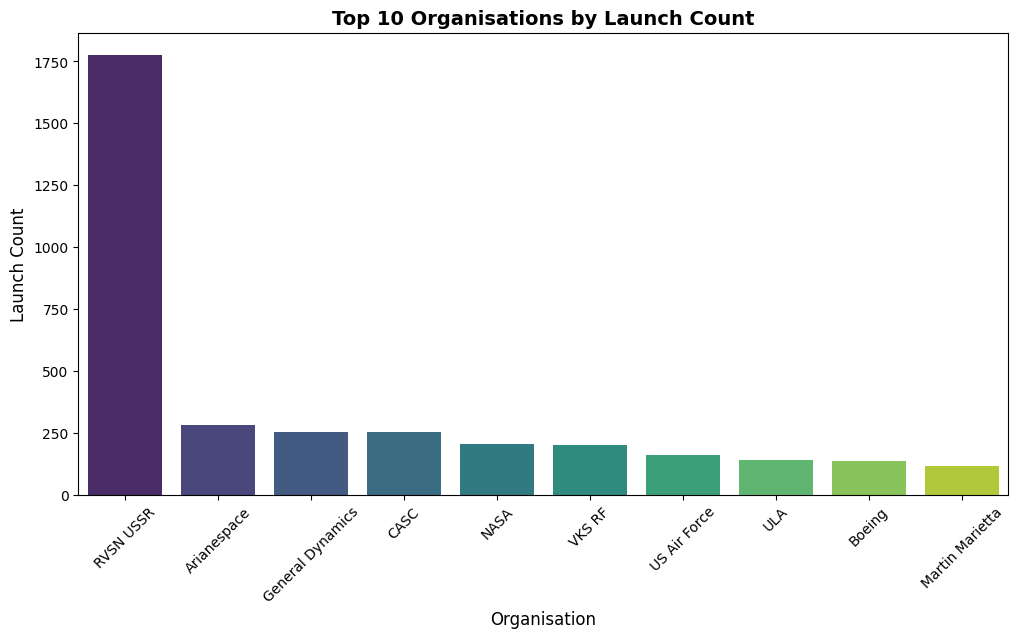

In [248]:
top_10_orgs = df['Organisation'].value_counts().head(10).reset_index()
top_10_orgs.columns = ['Organisation', 'Count']

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=top_10_orgs, x='Organisation', y='Count', palette='viridis', ax=ax)
ax.set_title('Top 10 Organisations by Launch Count', fontsize=14, fontweight='bold')
ax.set_xlabel('Organisation', fontsize=12)
ax.set_ylabel('Launch Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\franf\AppData\Local\Temp\ipykernel_14996\3813029271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df,
C:\Users\franf\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\franf\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


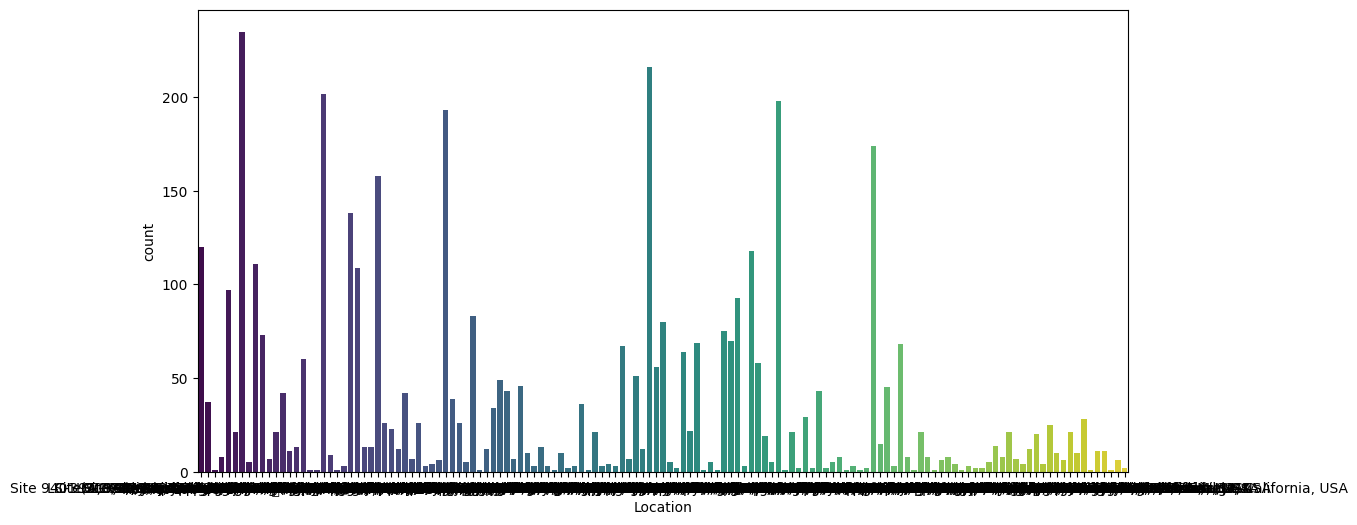

In [246]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax = sns.countplot(data=df,
                   x='Location',
                   palette='viridis')